## Dataset Exploration

In [82]:
import re
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
#!wget http://download.cs.stanford.edu/deep/CheXpert-v1.0-small.zip


In [45]:
!ls ~/idp-radio-1/data/CheXpert-v1.0-small/train

/home/jupyter/idp-radio-1/src/datasets


In [49]:
#data folder in ~/idp-radio-1/data/
data_folder = "../../data/"
chexpert_folder = data_folder+"CheXpert-v1.0-small/"
chexpert_folder

'../../data/CheXpert-v1.0-small/'

In [57]:
train_data_labels = pd.read_csv(chexpert_folder+'train.csv')  
valid_data_labels = pd.read_csv(chexpert_folder+'valid.csv')  

../../data/CheXpert-v1.0-small/train/patient00001/study1/view1_frontal.jpg


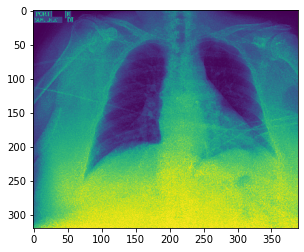

Path                          CheXpert-v1.0-small/train/patient00001/study1/...
Sex                                                                      Female
Age                                                                          68
Frontal/Lateral                                                         Frontal
AP/PA                                                                        AP
No Finding                                                                    1
Enlarged Cardiomediastinum                                                  NaN
Cardiomegaly                                                                NaN
Lung Opacity                                                                NaN
Lung Lesion                                                                 NaN
Edema                                                                       NaN
Consolidation                                                               NaN
Pneumonia                               

In [58]:
id = 0
path = data_folder + train_data_labels["Path"].iloc[id]
labels = train_data_labels.iloc[id]
print(path)

img=mpimg.imread(path)
imgplot = plt.imshow(img)
plt.show()
labels

In [52]:
def get_patient_id (row):
    patient_folder = re.findall(r"patient[0-9]+", row["Path"])
    if len(patient_folder) > 0:
        patient_number = re.findall(r"[0-9]+", patient_folder[0])
    if len(patient_number) > 0:
        return patient_number[0]

In [59]:
train_data_labels["patient_id"] = train_data_labels.apply(get_patient_id, axis = 1)
valid_data_labels["patient_id"] = valid_data_labels.apply(get_patient_id, axis = 1)

In [61]:
train_labels_byPatient = train_data_labels.groupby("patient_id")
train_patient_ids = pd.Series(list(train_labels_byPatient.groups.keys()))
valid_labels_byPatient = valid_data_labels.groupby("patient_id")
valid_patient_ids = pd.Series(list(valid_labels_byPatient.groups.keys()))

In [62]:
train_patient_ids

0        00001
1        00002
2        00003
3        00004
4        00005
         ...  
64535    64536
64536    64537
64537    64538
64538    64539
64539    64540
Length: 64540, dtype: object

In [65]:
sample_size = 6400
train_size = int (sample_size * 0.7)
test_size = int (sample_size * 0.3)

train_patients = train_patient_ids.sample(n=train_size)
test_patients = train_patient_ids[~train_patient_ids.isin(train_patients)].sample(n=test_size)
valid_patients = valid_patient_ids

train_labels = train_data_labels[train_data_labels["patient_id"].isin(train_patients)]
test_labels = train_data_labels[train_data_labels["patient_id"].isin(test_patients)]
valid_labels = valid_data_labels[valid_data_labels["patient_id"].isin(valid_patients)]

print("{patients} patients and {total} total samples in training set".format(patients=len(train_patients), total=len(train_labels)))
print("{patients} patients and {total} total samples in test set".format(patients=len(test_patients), total=len(test_labels)))
print("{patients} patients and {total} total samples in valid set".format(patients=len(valid_patients), total=len(valid_labels)))

4480 patients and 15614 total samples in training set
1920 patients and 6842 total samples in test set
200 patients and 234 total samples in valid set


In [88]:
#!mkdir ~/idp-radio-1/data/dev_dataset
#!mkdir ~/idp-radio-1/data/dev_dataset/CheXpert-v1.0-small
#!mkdir ~/idp-radio-1/data/dev_dataset/CheXpert-v1.0-small/train
!ls ~/idp-radio-1/data/dev_dataset/CheXpert-v1.0-small/train

In [70]:
train_labels.to_csv(data_folder + "dev_dataset/train.csv")
test_labels.to_csv(data_folder + "dev_dataset/test.csv")
valid_labels.to_csv(data_folder + "dev_dataset/valid.csv")

In [110]:

data_folder + "dev_dataset/"+ train_labels.iloc[id]["Path"]

'../../data/dev_dataset/CheXpert-v1.0-small/train/patient00019/study1/view1_frontal.jpg'

In [89]:
destinaton = data_folder + "dev_dataset/"+ train_labels["Path"].iloc[id]
destinaton_folder = destinaton.split("/")[:-1]
origin = data_folder + train_labels["Path"].iloc[id]
destinaton_folder

['..',
 '..',
 'data',
 'dev_dataset',
 'CheXpert-v1.0-small',
 'train',
 'patient00019',
 'study1']

In [116]:
def copy_dataset_file (label_row):
    origin = data_folder + label_row["Path"]
    destinaton = data_folder + "dev_dataset/"+ label_row["Path"]
    destinaton_folder = destinaton.split("/")[:-1]
    for i in range(len(destinaton_folder)):
        subfolder = "/".join(destinaton_folder[:i+1])
        if not os.path.exists(subfolder):
            os.mkdir(subfolder)
            #print(subfolder + " created")
    #print("copy from: "+origin)
    shutil.copyfile(origin, destinaton)

In [124]:
def copy_subset(data_labels):
    count = 1
    for index, row in data_labels.iterrows():
        if count % 1000 == 1:
            print("Copying the " + str(count) + "th file...")
        count += 1
        copy_dataset_file(row)
    print("Done copying " + str(count) + " files.")

In [125]:
copy_subset(train_labels)
copy_subset(test_labels)
copy_subset(valid_labels)

Copying the 1th file...
Copying the 1001th file...
Copying the 2001th file...
Copying the 3001th file...
Copying the 4001th file...
Copying the 5001th file...
Copying the 6001th file...
Copying the 7001th file...
Copying the 8001th file...
Copying the 9001th file...
Copying the 10001th file...
Copying the 11001th file...
Copying the 12001th file...
Copying the 13001th file...
Copying the 14001th file...
Copying the 15001th file...
Done copying 15615 files.
Copying the 1th file...
Copying the 1001th file...
Copying the 2001th file...
Copying the 3001th file...
Copying the 4001th file...
Copying the 5001th file...
Copying the 6001th file...
Done copying 6843 files.
Copying the 1th file...
Done copying 235 files.


In [134]:
!ls ~/idp-radio-1/data/dev_dataset

CheXpert-v1.0-small  test.csv  train.csv  valid.csv


In [132]:
!zip -r ~/ ~/idp-radio-1/data/dev_dataset/

  adding: home/jupyter/idp-radio-1/data/dev_dataset/ (stored 0%)
  adding: home/jupyter/idp-radio-1/data/dev_dataset/valid.csv (deflated 90%)
  adding: home/jupyter/idp-radio-1/data/dev_dataset/train.csv (deflated 89%)
  adding: home/jupyter/idp-radio-1/data/dev_dataset/test.csv (deflated 89%)
  adding: home/jupyter/idp-radio-1/data/dev_dataset/CheXpert-v1.0-small/ (stored 0%)
  adding: home/jupyter/idp-radio-1/data/dev_dataset/CheXpert-v1.0-small/valid/ (stored 0%)
  adding: home/jupyter/idp-radio-1/data/dev_dataset/CheXpert-v1.0-small/valid/patient64695/ (stored 0%)
  adding: home/jupyter/idp-radio-1/data/dev_dataset/CheXpert-v1.0-small/valid/patient64695/study1/ (stored 0%)
  adding: home/jupyter/idp-radio-1/data/dev_dataset/CheXpert-v1.0-small/valid/patient64695/study1/view1_frontal.jpg (deflated 0%)
  adding: home/jupyter/idp-radio-1/data/dev_dataset/CheXpert-v1.0-small/valid/patient64736/ (stored 0%)
  adding: home/jupyter/idp-radio-1/data/dev_dataset/CheXpert-v1.0-small/valid/pa